Theme: 
TMDB 5000 Movie Dataset
data source location: 
https://www.kaggle.com/tmdb/tmdb-movie-metadata
size of data: 
4803 rows x 24 columns, 9 MB
Hypothesis: 
Which month of movie release can make higher profit?
What movie genres make higher profit?
Explain:
The datasets contain basic information of movie and average vote score in between 1920 to 2017 of many countries. Among them, I will do data pre-processing and cleaning, feature analysis and visualization. 

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import scipy.stats as stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading Data

In [2]:
credits=pd.read_csv('tmdb_5000_credits.csv')
movies=pd.read_csv('tmdb_5000_movies.csv')

In [3]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
movie_id    4803 non-null int64
title       4803 non-null object
cast        4803 non-null object
crew        4803 non-null object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [4]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [6]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


# Data cleaning

Due to the features Genres, keywords, spoken_languages, production_companies and production_countries columns in the data are all in json format, which is inconvenient to analyze. It is necessary to convert the json string into a dictionary list form through json.loads. Then, loop is used to select the required data. In this analysis, the corresponding value of the name key is extracted and separated by ",".

In [7]:
json_cols=['cast','crew']
for i in json_cols:
    credits[i]=credits[i].apply(json.loads)
def get_names(x):
    return ','.join([i['name'] for i in x])

In [8]:
credits['cast']=credits['cast'].apply(get_names)

In [9]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"Sam Worthington,Zoe Saldana,Sigourney Weaver,S...","[{'credit_id': '52fe48009251416c750aca23', 'de..."
1,285,Pirates of the Caribbean: At World's End,"Johnny Depp,Orlando Bloom,Keira Knightley,Stel...","[{'credit_id': '52fe4232c3a36847f800b579', 'de..."
2,206647,Spectre,"Daniel Craig,Christoph Waltz,Léa Seydoux,Ralph...","[{'credit_id': '54805967c3a36829b5002c41', 'de..."
3,49026,The Dark Knight Rises,"Christian Bale,Michael Caine,Gary Oldman,Anne ...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de..."
4,49529,John Carter,"Taylor Kitsch,Lynn Collins,Samantha Morton,Wil...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de..."


In [10]:
#crew  提取导演director
def director(x):
    for i in x:
        if i['job'] == 'Director':                #判断director
            return i['name']
credits['crew'] = credits['crew'].apply(director) 
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"Sam Worthington,Zoe Saldana,Sigourney Weaver,S...",James Cameron
1,285,Pirates of the Caribbean: At World's End,"Johnny Depp,Orlando Bloom,Keira Knightley,Stel...",Gore Verbinski
2,206647,Spectre,"Daniel Craig,Christoph Waltz,Léa Seydoux,Ralph...",Sam Mendes
3,49026,The Dark Knight Rises,"Christian Bale,Michael Caine,Gary Oldman,Anne ...",Christopher Nolan
4,49529,John Carter,"Taylor Kitsch,Lynn Collins,Samantha Morton,Wil...",Andrew Stanton


In [11]:
json_cols=['genres','keywords','spoken_languages','production_countries','production_companies']
for i in json_cols:
    movies[i]=movies[i].apply(json.loads)
def get_names(x):
    return ','.join([i['name'] for i in x])
movies['genres']=movies['genres'].apply(get_names)
movies['keywords']=movies['keywords'].apply(get_names)
movies['spoken_languages']=movies['spoken_languages'].apply(get_names)
movies['production_countries']=movies['production_countries'].apply(get_names)
movies['production_companies']=movies['production_companies'].apply(get_names)

In [12]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"Action,Adventure,Fantasy,Science Fiction",http://www.avatarmovie.com/,19995,"culture clash,future,space war,space colony,so...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners,Twentieth Century Fox ...","United States of America,United Kingdom",2009-12-10,2787965087,162.0,"English,Español",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"Adventure,Fantasy,Action",http://disney.go.com/disneypictures/pirates/,285,"ocean,drug abuse,exotic island,east india trad...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",United States of America,2007-05-19,961000000,169.0,English,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"Action,Adventure,Crime",http://www.sonypictures.com/movies/spectre/,206647,"spy,based on novel,secret agent,sequel,mi6,bri...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"Columbia Pictures,Danjaq,B24","United Kingdom,United States of America",2015-10-26,880674609,148.0,"Français,English,Español,Italiano,Deutsch",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"Action,Crime,Drama,Thriller",http://www.thedarkknightrises.com/,49026,"dc comics,crime fighter,terrorist,secret ident...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"Legendary Pictures,Warner Bros.,DC Entertainme...",United States of America,2012-07-16,1084939099,165.0,English,Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"Action,Adventure,Science Fiction",http://movies.disney.com/john-carter,49529,"based on novel,mars,medallion,space travel,pri...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,132.0,English,Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [13]:
#merge 2 CSVs since they have same id
df = credits.merge(right=movies,how='inner',left_on='movie_id',right_on='id')
df.head()

,movie_id,title_x,cast,crew,budget,genres,homepage,id,keywords,original_language,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_y,vote_average,vote_count
0,19995,Avatar,"Sam Worthington,Zoe Saldana,Sigourney Weaver,S...",James Cameron,237000000,"Action,Adventure,Fantasy,Science Fiction",http://www.avatarmovie.com/,19995,"culture clash,future,space war,space colony,so...",en,...,"United States of America,United Kingdom",2009-12-10,2787965087,162.0,"English,Español",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"Johnny Depp,Orlando Bloom,Keira Knightley,Stel...",Gore Verbinski,300000000,"Adventure,Fantasy,Action",http://disney.go.com/disneypictures/pirates/,285,"ocean,drug abuse,exotic island,east india trad...",en,...,United States of America,2007-05-19,961000000,169.0,English,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,206647,Spectre,"Daniel Craig,Christoph Waltz,Léa Seydoux,Ralph...",Sam Mendes,245000000,"Action,Adventure,Crime",http://www.sonypictures.com/movies/spectre/,206647,"spy,based on novel,secret agent,sequel,mi6,bri...",en,...,"United Kingdom,United States of America",2015-10-26,880674609,148.0,"Français,English,Español,Italiano,Deutsch",Released,A Plan No One Escapes,Spectre,6.3,4466
3,49026,The Dark Knight Rises,"Christian Bale,Michael Caine,Gary Oldman,Anne ...",Christopher Nolan,250000000,"Action,Crime,Drama,Thriller",http://www.thedarkknightrises.com/,49026,"dc comics,crime fighter,terrorist,secret ident...",en,...,United States of America,2012-07-16,1084939099,165.0,English,Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,49529,John Carter,"Taylor Kitsch,Lynn Collins,Samantha Morton,Wil...",Andrew Stanton,260000000,"Action,Adventure,Science Fiction",http://movies.disney.com/john-carter,49529,"based on novel,mars,medallion,space travel,pri...",en,...,United States of America,2012-03-07,284139100,132.0,English,Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [14]:
df.info()
#Runtime column has 2 missing data, Release data has 1 missing data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 24 columns):
movie_id                4803 non-null int64
title_x                 4803 non-null object
cast                    4803 non-null object
crew                    4773 non-null object
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null ob

In [15]:
runtime_data_null=df['runtime'].isnull()
df.loc[runtime_data_null,:]

,movie_id,title_x,cast,crew,budget,genres,homepage,id,keywords,original_language,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_y,vote_average,vote_count
2656,370980,Chiamatemi Francesco - Il Papa della gente,"Rodrigo de la Serna,Sergio Hernández,Àlex Bren...",Daniele Luchetti,15000000,Drama,NaN,370980,"pope,biography",it,...,Italy,2015-12-03,0,NaN,Español,Released,NaN,Chiamatemi Francesco - Il Papa della gente,7.3,12
4140,459488,"To Be Frank, Sinatra at 100",Tony Oppedisano,Simon Napier-Bell,2,Documentary,NaN,459488,"music,actors,legendary perfomer,classic hollyw...",en,...,United Kingdom,2015-12-12,0,NaN,,Released,NaN,"To Be Frank, Sinatra at 100",0.0,0


In [16]:
release_date_null=df['release_date'].isnull()
df.loc[release_date_null,:]

,movie_id,title_x,cast,crew,budget,genres,homepage,id,keywords,original_language,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_y,vote_average,vote_count
4553,380097,America Is Still the Place,,None,0,,NaN,380097,,en,...,,NaN,0,0.0,,Released,NaN,America Is Still the Place,0.0,0


In [17]:
#find the missing release data and runtime from Google and fill them out:
df['release_date']=df['release_date'].fillna('2014-06-01')
#df['runtime']=df['runtime'].fillna(df.runtime.mean())
df[df[['release_date','runtime']].isnull().values==True]

,movie_id,title_x,cast,crew,budget,genres,homepage,id,keywords,original_language,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_y,vote_average,vote_count
2656,370980,Chiamatemi Francesco - Il Papa della gente,"Rodrigo de la Serna,Sergio Hernández,Àlex Bren...",Daniele Luchetti,15000000,Drama,NaN,370980,"pope,biography",it,...,Italy,2015-12-03,0,NaN,Español,Released,NaN,Chiamatemi Francesco - Il Papa della gente,7.3,12
4140,459488,"To Be Frank, Sinatra at 100",Tony Oppedisano,Simon Napier-Bell,2,Documentary,NaN,459488,"music,actors,legendary perfomer,classic hollyw...",en,...,United Kingdom,2015-12-12,0,NaN,,Released,NaN,"To Be Frank, Sinatra at 100",0.0,0


In [18]:
df['runtime'] = df['runtime'].fillna(113, limit=1)
df['runtime'] = df['runtime'].fillna(81, limit=1)

In [19]:
release_date_null=df['release_date'].isnull()
df.loc[release_date_null,:]

,movie_id,title_x,cast,crew,budget,genres,homepage,id,keywords,original_language,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_y,vote_average,vote_count


In [20]:
runtime_data_null=df['runtime'].isnull()
df.loc[runtime_data_null,:]

,movie_id,title_x,cast,crew,budget,genres,homepage,id,keywords,original_language,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_y,vote_average,vote_count


In [21]:
#delete the unecessary columns which are not gonna use 
del df['id']
del df['homepage']
del df['original_title']
del df['overview']
del df['spoken_languages']
del df['tagline']
df.head()

,movie_id,title_x,cast,crew,budget,genres,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title_y,vote_average,vote_count
0,19995,Avatar,"Sam Worthington,Zoe Saldana,Sigourney Weaver,S...",James Cameron,237000000,"Action,Adventure,Fantasy,Science Fiction","culture clash,future,space war,space colony,so...",en,150.437577,"Ingenious Film Partners,Twentieth Century Fox ...","United States of America,United Kingdom",2009-12-10,2787965087,162.0,Released,Avatar,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"Johnny Depp,Orlando Bloom,Keira Knightley,Stel...",Gore Verbinski,300000000,"Adventure,Fantasy,Action","ocean,drug abuse,exotic island,east india trad...",en,139.082615,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",United States of America,2007-05-19,961000000,169.0,Released,Pirates of the Caribbean: At World's End,6.9,4500
2,206647,Spectre,"Daniel Craig,Christoph Waltz,Léa Seydoux,Ralph...",Sam Mendes,245000000,"Action,Adventure,Crime","spy,based on novel,secret agent,sequel,mi6,bri...",en,107.376788,"Columbia Pictures,Danjaq,B24","United Kingdom,United States of America",2015-10-26,880674609,148.0,Released,Spectre,6.3,4466
3,49026,The Dark Knight Rises,"Christian Bale,Michael Caine,Gary Oldman,Anne ...",Christopher Nolan,250000000,"Action,Crime,Drama,Thriller","dc comics,crime fighter,terrorist,secret ident...",en,112.312950,"Legendary Pictures,Warner Bros.,DC Entertainme...",United States of America,2012-07-16,1084939099,165.0,Released,The Dark Knight Rises,7.6,9106
4,49529,John Carter,"Taylor Kitsch,Lynn Collins,Samantha Morton,Wil...",Andrew Stanton,260000000,"Action,Adventure,Science Fiction","based on novel,mars,medallion,space travel,pri...",en,43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,132.0,Released,John Carter,6.1,2124


# Data analysis and visualization

In [22]:
df['genres'][1].split(',')

['Adventure', 'Fantasy', 'Action']

In [23]:
#set() function creates an set of non-repeating elements
genre=set()
for i in df['genres'].str.split(','):
    genre=set().union(i,genre)

In [24]:
#remove unless fields from the list
genre.remove('')

In [25]:
#for loop, genre is a list, genr is a str
for genr in genre:
    df[genr]=df['genres'].str.contains(genr).apply(lambda x:1 if x else 0)

In [26]:
df_gy=df.loc[:,genre]

In [27]:
#ranking of genres of movie amount
df_gysum=df_gy.sum().sort_values(ascending=True)
df_gysum

TV Movie              8
Foreign              34
Western              82
Documentary         110
War                 144
Music               185
History             197
Animation           234
Mystery             348
Fantasy             424
Family              513
Horror              519
Science Fiction     535
Crime               696
Adventure           790
Romance             894
Action             1154
Thriller           1274
Comedy             1722
Drama              2297
dtype: int64

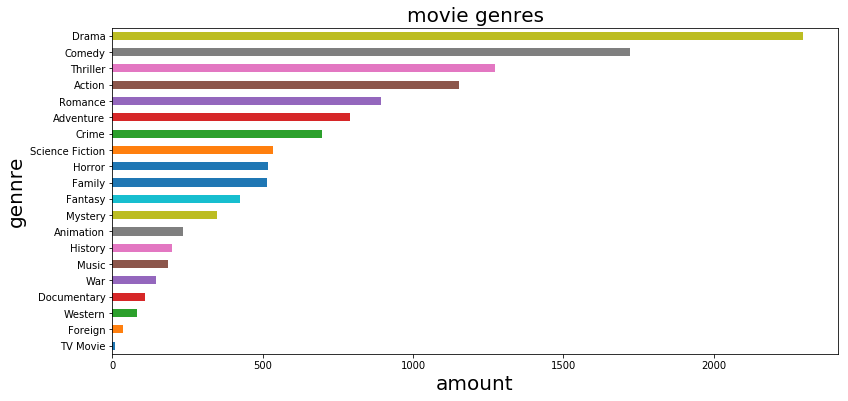

In [28]:
#bar chart of the amount of movie genres
df_gysum.plot.barh(label='genre',figsize=(13,6))
plt.title('movie genres',fontsize=20)
plt.xlabel('amount',fontsize=20)
plt.ylabel('gennre',fontsize=20)
plt.show()

In [29]:
df['release_year']=pd.to_datetime(df.release_date,format='%Y-%m-%d').dt.year

In [30]:
df_gy.index = df['release_year']#use‘release_year’ as index
df.head()

,movie_id,title_x,cast,crew,budget,genres,keywords,original_language,popularity,production_companies,...,Science Fiction,Mystery,Animation,Comedy,Family,Music,Drama,Western,Adventure,release_year
0,19995,Avatar,"Sam Worthington,Zoe Saldana,Sigourney Weaver,S...",James Cameron,237000000,"Action,Adventure,Fantasy,Science Fiction","culture clash,future,space war,space colony,so...",en,150.437577,"Ingenious Film Partners,Twentieth Century Fox ...",...,1,0,0,0,0,0,0,0,1,2009
1,285,Pirates of the Caribbean: At World's End,"Johnny Depp,Orlando Bloom,Keira Knightley,Stel...",Gore Verbinski,300000000,"Adventure,Fantasy,Action","ocean,drug abuse,exotic island,east india trad...",en,139.082615,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",...,0,0,0,0,0,0,0,0,1,2007
2,206647,Spectre,"Daniel Craig,Christoph Waltz,Léa Seydoux,Ralph...",Sam Mendes,245000000,"Action,Adventure,Crime","spy,based on novel,secret agent,sequel,mi6,bri...",en,107.376788,"Columbia Pictures,Danjaq,B24",...,0,0,0,0,0,0,0,0,1,2015
3,49026,The Dark Knight Rises,"Christian Bale,Michael Caine,Gary Oldman,Anne ...",Christopher Nolan,250000000,"Action,Crime,Drama,Thriller","dc comics,crime fighter,terrorist,secret ident...",en,112.312950,"Legendary Pictures,Warner Bros.,DC Entertainme...",...,0,0,0,0,0,0,1,0,0,2012
4,49529,John Carter,"Taylor Kitsch,Lynn Collins,Samantha Morton,Wil...",Andrew Stanton,260000000,"Action,Adventure,Science Fiction","based on novel,mars,medallion,space travel,pri...",en,43.926995,Walt Disney Pictures,...,1,0,0,0,0,0,0,0,1,2012


In [31]:
df_gy1=df_gy.sort_index(ascending=False)#sort by index year

In [32]:
df_gy2=df_gy1.groupby('release_year').sum()#count the number of each genres per year

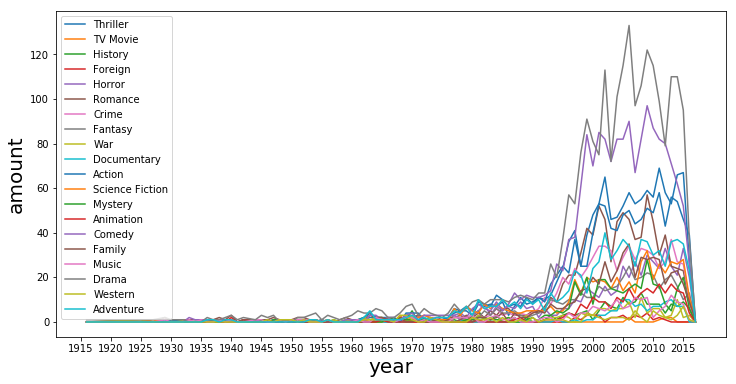

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(df_gy2,label=df_gy2.columns)
plt.legend(df_gy2)
plt.xticks(range(1915,2018,5))
plt.xlabel('year',fontsize=20)
plt.ylabel('amount',fontsize=20)
plt.show()

Drama and Comdy fluctuate a lot over time, they growth fast.

In [34]:
df.revenue.describe()

count    4.803000e+03
mean     8.226064e+07
std      1.628571e+08
min      0.000000e+00
25%      0.000000e+00
50%      1.917000e+07
75%      9.291719e+07
max      2.787965e+09
Name: revenue, dtype: float64

In [35]:
df.budget.describe()

count    4.803000e+03
mean     2.904504e+07
std      4.072239e+07
min      0.000000e+00
25%      7.900000e+05
50%      1.500000e+07
75%      4.000000e+07
max      3.800000e+08
Name: budget, dtype: float64

In [36]:
#define profit
df['profit']=df['revenue']-df['budget']

In [37]:
#make movie genre into index
df_gen_pro=pd.DataFrame(index=genre)

In [38]:
#get the average profit for each genre
#create a list
#create a loop to go throught
list=[]
for genr in genre:
    list.append(df.groupby(genr)['profit'].mean())
list2=[]
for i in range(len(genre)):
    list2.append(list[i][1])
df_gen_pro['mean_profit']=list2

In [39]:
#average profit of movie amount
df_gen_pro

,mean_profit
Thriller,4.907608e+07
TV Movie,-1.150000e+06
History,2.762010e+07
Foreign,-2.934369e+05
Horror,2.897105e+07
Romance,3.969103e+07
Crime,3.830085e+07
Fantasy,1.297936e+08
War,4.887342e+07
Documentary,7.185600e+06


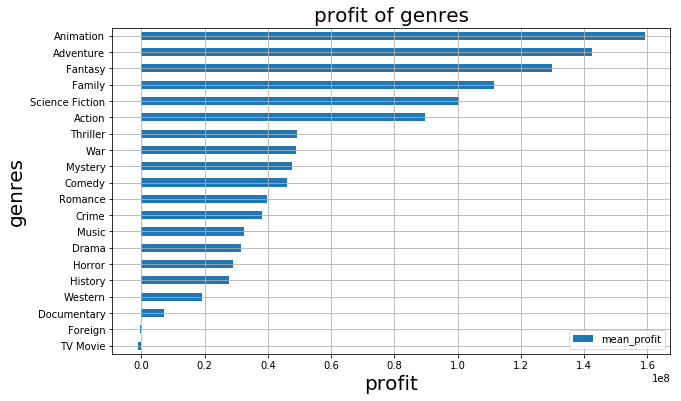

In [40]:
df_gen_pro.sort_values(by='mean_profit',ascending=True).plot.barh(label='genre',figsize=(10,6))
plt.title('profit of genres',fontsize=20)
plt.xlabel('profit',fontsize=20)
plt.ylabel('genres',fontsize=20)
plt.grid(True)
plt.show()

It can be seen that Animation, Advanture and Fantasy are the three types of films with the best profit, while Foreign and TV Movie will lose money. As I use mean_profit to be ROI(return on investment), it can be concluded that Action, Documentary and Thriller are top three best ROI, Foreign and TV Movie will have the wrose ROI.

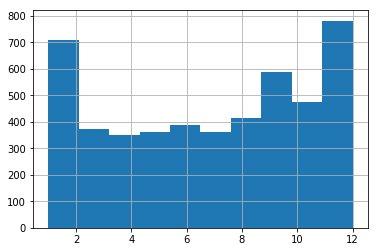

In [41]:
#The distribution of release data 
df['month']=pd.to_datetime(df['release_date']).apply(lambda x: x.month)
df.month.hist()

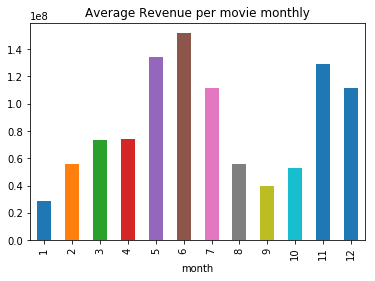

In [42]:
#calculate the average revenue of one movie per month
revenue_month=df.groupby('month').revenue.sum() / df.groupby('month').size()
revenue_month.plot(kind='bar', title='Average Revenue per movie monthly')

Publishers are most likely to release new films in December, followed by January. 
Competition will be fierce in these two months.
April is the fewest release month.
The film relsed in June have the highest average profit and January's had lowest.

In [43]:
df_gen_popu=pd.DataFrame(index=genre)
list=[]
for genr in genre:
    list.append(df.groupby(genr)['popularity'].mean())
list2=[]
for i in range(len(genre)):
    list2.append(list[i][1])
df_gen_popu['mean_popularity']=list2
df_gen_popu

,mean_popularity
Thriller,24.460077
TV Movie,6.389415
History,17.444839
Foreign,0.686787
Horror,18.295915
Romance,15.962426
Crime,22.853274
Fantasy,36.387043
War,23.777289
Documentary,3.945724


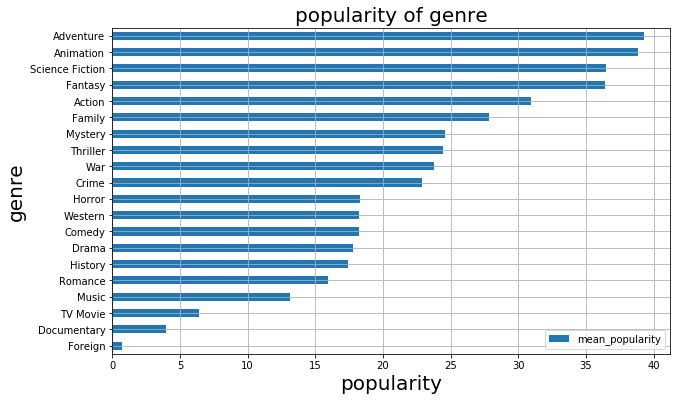

In [44]:
df_gen_popu.sort_values(by='mean_popularity',ascending=True).plot.barh(label='genre',figsize=(10,6))
plt.title('popularity of genre',fontsize=20)
plt.xlabel('popularity',fontsize=20)
plt.ylabel('genre',fontsize=20)
plt.grid(True)
plt.show()

The four favorite genres are Adventure, Animation, Science Fiction and Fantasy

In [54]:
corrdf=df.corr()
corrdf['revenue'].sort_values(ascending=False)

revenue            1.000000
profit             0.978881
vote_count         0.781487
budget             0.730823
popularity         0.644724
Adventure          0.344400
runtime            0.251136
Fantasy            0.212287
Action             0.203590
Animation          0.199335
vote_average       0.197150
Family             0.170067
Science Fiction    0.152621
release_year       0.090084
month              0.055255
War                0.002046
Thriller          -0.004488
Mystery           -0.006796
TV Movie          -0.020634
Western           -0.029148
History           -0.031417
Crime             -0.040726
Music             -0.041550
Foreign           -0.042465
Comedy            -0.050369
movie_id          -0.050425
Romance           -0.065368
Documentary       -0.068089
Horror            -0.082753
Drama             -0.177229
Name: revenue, dtype: float64

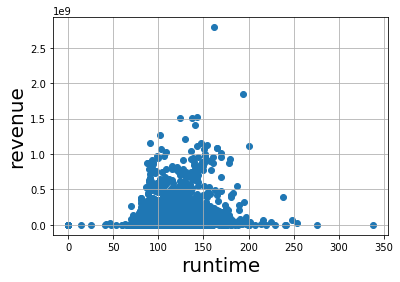

In [45]:
plt.scatter(x=df.runtime,y=df.revenue)
plt.xlabel('runtime',fontsize=20)
plt.ylabel('revenue',fontsize=20)
plt.grid(True)
plt.show()

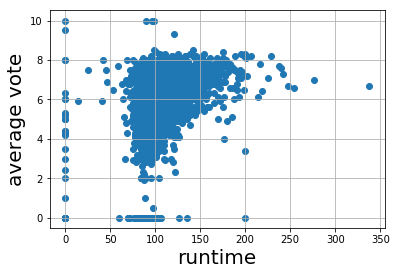

In [46]:
plt.scatter(x=df.runtime,y=df.vote_average)
plt.xlabel('runtime',fontsize=20)
plt.ylabel('average vote',fontsize=20)
plt.grid(True)
plt.show()

The highest profit films range in length from 80 to 150 minutes.
Most of the movies that audiences like are 90-160 minutes.

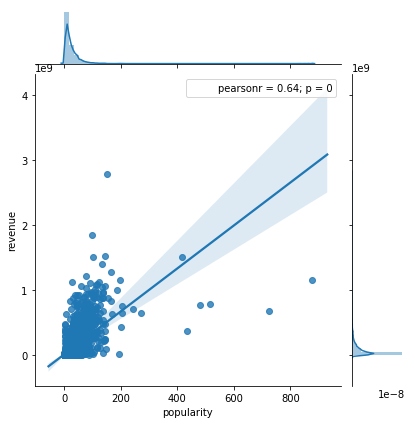

In [47]:
_=sns.jointplot("popularity","revenue",data=df,kind="reg")
_=_.annotate(stats.pearsonr)

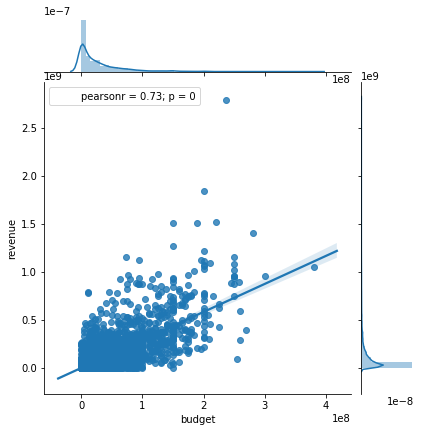

In [48]:
_=sns.jointplot("budget","revenue",data=df,kind="reg")
_=_.annotate(stats.pearsonr)

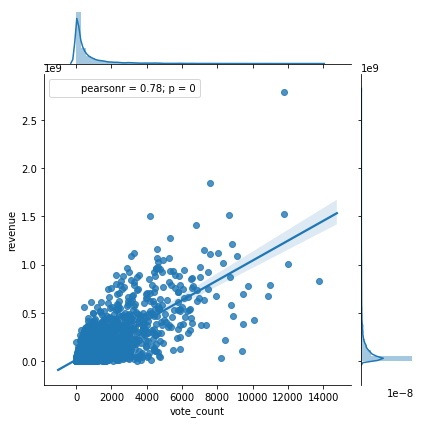

In [49]:
_=sns.jointplot("vote_count","revenue",data=df,kind="reg")
_=_.annotate(stats.pearsonr)

It can be seen from the above figure that the revenun is a linear relationship with the vote_count, vote_count and popularity budget this three features.

Conlusion: The result of hypothesis of relase date of movie make higher profit is June. 
    The movie genres of comedies make higher profit. 
    The result of top 3 of pearson correlation coefficient with revenue, 
    which means the most top three factors that affect revenue are audience rating, budget and popularity.
Prediction: For invester who want to be make huge porfit on movie, I would recommend invest Adventure with approapriate budget and release in June，limit the length of the film from 90 to 150 minutes.